Reading TensorBoard logs...
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read train fold 0: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read train fold 1: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read train fold 2: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read train fold 3: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read train fold 4: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read test fold 0: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read test fold 1: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_Z_nRMSE']
Read test fold 2: 4000 records
Available tags: ['loss(MAE)', 'angle_X_nRMSE', 'angle_Y_nRMSE', 'angle_

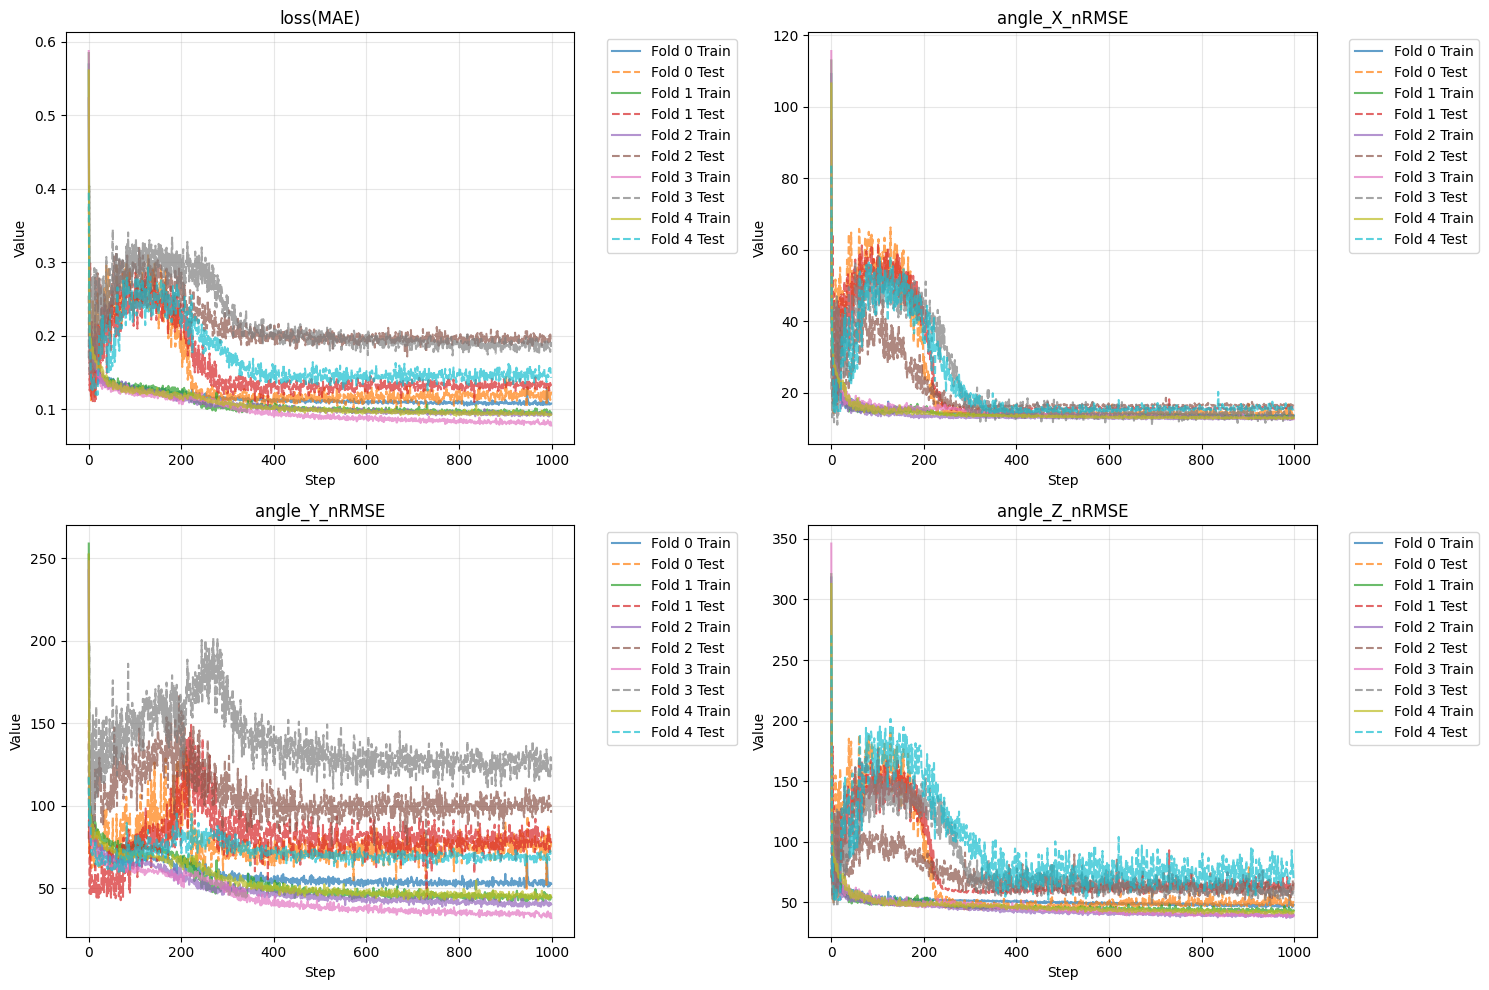


=== CROSS-VALIDATION RESULTS ===
                    mean        std
metric                             
angle_X_nRMSE  15.013919   1.340822
angle_Y_nRMSE  88.572278  21.054955
angle_Z_nRMSE  61.712032   6.424929
loss(MAE)       0.155525   0.030998


C:\Users\asmith8\AppData\Local\Temp\ipykernel_11196\1198197793.py:154: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([train_vals, test_vals], labels=['Train', 'Test'])
C:\Users\asmith8\AppData\Local\Temp\ipykernel_11196\1198197793.py:154: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([train_vals, test_vals], labels=['Train', 'Test'])
C:\Users\asmith8\AppData\Local\Temp\ipykernel_11196\1198197793.py:154: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([train_vals, test_vals], labels=['Train', 'Test'])
C:\Users\asmith8\AppData\Local\Temp\ipykernel_11196\1198197793.py:154: Ma

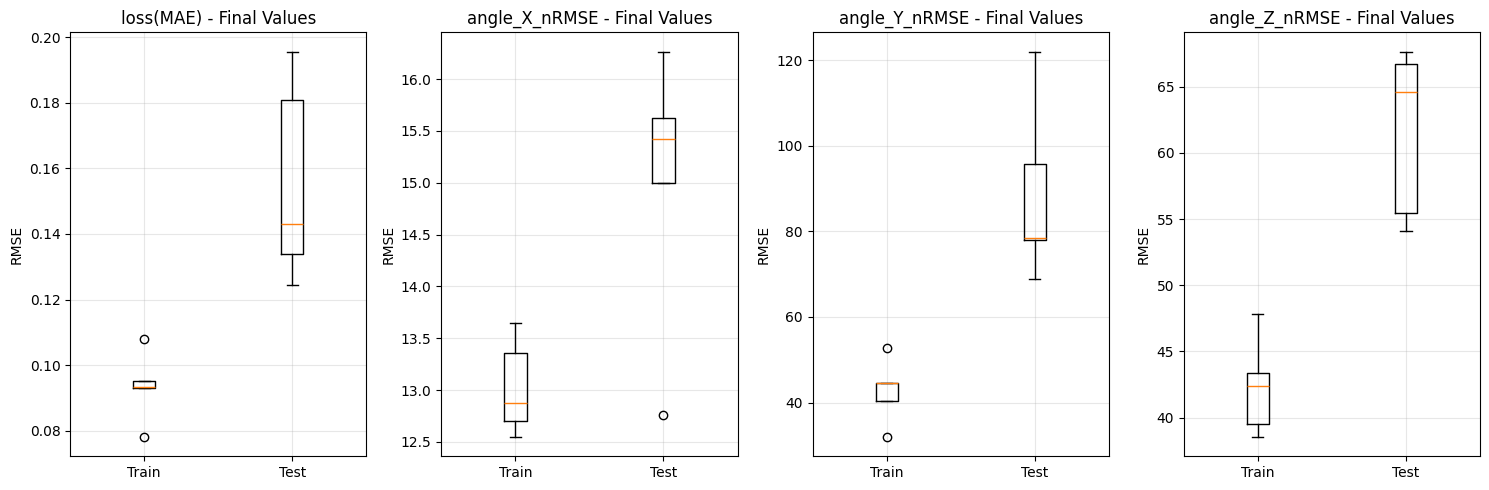


=== DETAILED RESULTS BY FOLD ===
metric angle_X_nRMSE            angle_Y_nRMSE            angle_Z_nRMSE  \
phase           test      train          test      train          test   
fold                                                                     
0          14.999759  13.649250     77.888733  52.697781     54.121719   
1          15.620790  13.361127     78.440407  44.603489     64.603638   
2          16.265783  12.697302     95.747459  40.261379     66.698776   
3          12.758529  12.546821    121.962494  31.950596     55.475578   
4          15.424732  12.878207     68.822296  44.480114     67.660446   

metric            loss(MAE)            
phase       train      test     train  
fold                                   
0       47.842567  0.124291  0.107982  
1       43.363804  0.133865  0.095257  
2       39.539658  0.195552  0.093437  
3       38.527119  0.180853  0.078113  
4       42.383770  0.143065  0.092969  

=== FINAL CROSS-VALIDATION METRICS ===
loss(MAE): 0.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np

# Set style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

def read_tensorboard_logs(log_dir):
    """Read TensorBoard logs from a directory"""
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    
    # Get scalar tags
    tags = event_acc.Tags()['scalars']
    print(f"Available tags: {tags}")
    
    data = []
    for tag in tags:
        events = event_acc.Scalars(tag)
        for event in events:
            data.append({
                'tag': tag,
                'step': event.step,
                'value': event.value,
                'wall_time': event.wall_time
            })
    
    return pd.DataFrame(data)

def read_all_folds(base_dir):
    """Read logs from all folds for both train and test"""
    all_data = []
    
    # Read train data
    for fold in range(5):  # 0-4 folds
        train_dir = os.path.join(base_dir, 'train', f'{fold}_fold')
        if os.path.exists(train_dir):
            try:
                df = read_tensorboard_logs(train_dir)
                df['fold'] = fold
                df['phase'] = 'train'
                all_data.append(df)
                print(f"Read train fold {fold}: {len(df)} records")
            except Exception as e:
                print(f"Error reading train fold {fold}: {e}")
    
    # Read test data
    for fold in range(5):  # 0-4 folds
        test_dir = os.path.join(base_dir, 'test', f'{fold}_fold')
        if os.path.exists(test_dir):
            try:
                df = read_tensorboard_logs(test_dir)
                df['fold'] = fold
                df['phase'] = 'test'
                all_data.append(df)
                print(f"Read test fold {fold}: {len(df)} records")
            except Exception as e:
                print(f"Error reading test fold {fold}: {e}")
    
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

# Main directory (update this path)
base_dir = r"R:\KumarLab3\PROJECTS\wesens\Data\Analysis\smith_dl\IMU Deep Learning\training\logs\date_Dense_1st_torch\Dense_1st_torch\IWALQQ_1st_correction\angle\LR_0.0005_BS_64_LF_RMSE"

# Read all data
print("Reading TensorBoard logs...")
df = read_all_folds(base_dir)

if df.empty:
    print("No data found! Check your path.")
else:
    print(f"Total records: {len(df)}")
    print(f"Available tags: {df['tag'].unique()}")
    print(f"Folds: {sorted(df['fold'].unique())}")
    print(f"Phases: {df['phase'].unique()}")

# Plot 1: Training curves for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

metrics = df['tag'].unique()
for i, metric in enumerate(metrics[:4]):  # Plot first 4 metrics
    if i < len(axes):
        metric_data = df[df['tag'] == metric]
        
        for fold in sorted(metric_data['fold'].unique()):
            fold_data = metric_data[metric_data['fold'] == fold]
            
            # Plot train
            train_data = fold_data[fold_data['phase'] == 'train']
            if not train_data.empty:
                axes[i].plot(train_data['step'], train_data['value'], 
                           label=f'Fold {fold} Train', linestyle='-', alpha=0.7)
            
            # Plot test
            test_data = fold_data[fold_data['phase'] == 'test']
            if not test_data.empty:
                axes[i].plot(test_data['step'], test_data['value'], 
                           label=f'Fold {fold} Test', linestyle='--', alpha=0.7)
        
        axes[i].set_title(f'{metric}')
        axes[i].set_xlabel('Step')
        axes[i].set_ylabel('Value')
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 2: Final performance comparison
final_results = []
for fold in sorted(df['fold'].unique()):
    for phase in ['train', 'test']:
        for metric in df['tag'].unique():
            fold_metric_data = df[(df['fold'] == fold) & 
                                (df['phase'] == phase) & 
                                (df['tag'] == metric)]
            if not fold_metric_data.empty:
                final_value = fold_metric_data.iloc[-1]['value']  # Last recorded value
                final_results.append({
                    'fold': fold,
                    'phase': phase,
                    'metric': metric,
                    'final_value': final_value
                })

final_df = pd.DataFrame(final_results)

if not final_df.empty:
    # Cross-validation summary
    print("\n=== CROSS-VALIDATION RESULTS ===")
    cv_summary = final_df[final_df['phase'] == 'test'].groupby('metric')['final_value'].agg(['mean', 'std'])
    print(cv_summary)
    
    # Plot final results
    fig, axes = plt.subplots(1, len(final_df['metric'].unique()), figsize=(15, 5))
    if len(final_df['metric'].unique()) == 1:
        axes = [axes]
    
    for i, metric in enumerate(final_df['metric'].unique()):
        metric_data = final_df[final_df['metric'] == metric]
        
        # Simple box plot alternative
        train_vals = metric_data[metric_data['phase'] == 'train']['final_value']
        test_vals = metric_data[metric_data['phase'] == 'test']['final_value']
        
        axes[i].boxplot([train_vals, test_vals], labels=['Train', 'Test'])
        axes[i].set_title(f'{metric} - Final Values')
        axes[i].set_ylabel('RMSE')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Print summary table
print("\n=== DETAILED RESULTS BY FOLD ===")
pivot_table = final_df.pivot_table(index='fold', columns=['metric', 'phase'], values='final_value')
print(pivot_table)

# Calculate what you actually need for cross-validation
print("\n=== FINAL CROSS-VALIDATION METRICS ===")
test_only = final_df[final_df['phase'] == 'test']
for metric in test_only['metric'].unique():
    metric_values = test_only[test_only['metric'] == metric]['final_value']
    print(f"{metric}: {metric_values.mean():.3f} ± {metric_values.std():.3f}")
    print(f"  Individual fold results: {list(metric_values.round(3))}")
